

---


  **He aplicado el modelo de clustering con x4 grupos óptimos basándome en el método del codo. Puedes revisar el resumen de las características promedio de cada cluster en el archivo compartido. Esto te permitirá observar cómo se agrupan los hogares según su tamaño, distribución de género, edades y disponibilidad tecnológica.**

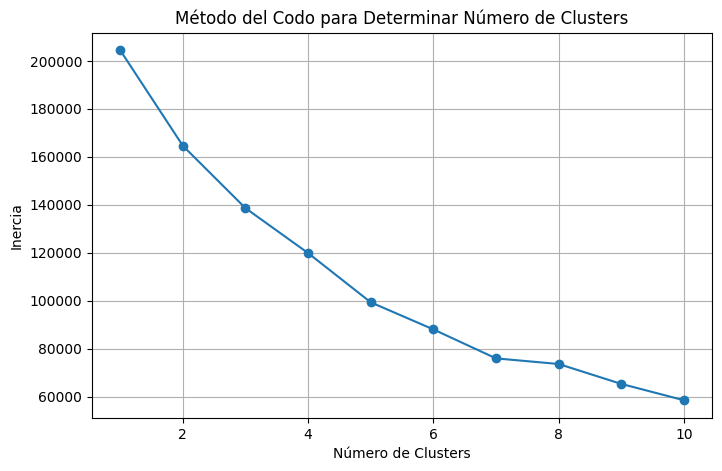

,personas_vivienda,hombres_vivienda,mujeres_vivienda,personas_0_29,compu_escritorio,compu_portatil,tv_digital,tablet_disponible,celular_smartphone
cluster,,,,,,,,,
0,4.709292,2.304267,2.405026,1.068541,1.901484,1.659594,1.014812,1.898797,1.041037
1,4.368790,2.129456,2.239334,1.000000,1.341321,1.059614,1.008767,1.314728,1.011105
2,4.514730,2.154095,2.360635,1.000000,1.890579,1.773066,2.000000,1.912917,1.089026
3,2.022035,0.985678,1.036357,1.944057,1.778412,1.524978,1.204627,1.775669,1.041926


In [ ]:
# Reimporting necessary libraries and reloading the dataset
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Reload the dataset
dataset_path = os.path.join('..', 'data', 'interim', 'vivienda', 'dataset_vivienda.csv')
dataset = pd.read_csv(dataset_path)

# Selección de variables para el clustering
clustering_columns = [
    'personas_vivienda', 'hombres_vivienda', 'mujeres_vivienda',
    'personas_0_29', 'compu_escritorio', 'compu_portatil',
    'tv_digital', 'tablet_disponible', 'celular_smartphone'
]
clustering_data = dataset[clustering_columns]

# Escalamiento de los datos
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Determinar el número óptimo de clusters usando el método del codo
inertia = []
range_clusters = range(1, 11)

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Método del Codo para Determinar Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid()
plt.show()

# Basado en el gráfico, seleccionemos un número de clusters y realicemos el clustering.
# Aquí, asumimos que el número óptimo de clusters es 4.
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_data_scaled)

# Agregar los clusters al dataset original
dataset['cluster'] = cluster_labels

# Mostrar un resumen de las características por cluster
cluster_summary = dataset.groupby('cluster')[clustering_columns].mean()

cluster_summary


**He calculado los siguientes resultados clave del modelo de clustering:**

* **Centroides de los Clusters:**

  * Representan los valores promedio de las variables para cada cluster. Puedes usar esta información para interpretar las características de cada grupo.

* **Cantidad de Datos por Cluster:**

  * Muestra la cantidad de hogares asignados a cada cluster, lo cual ayuda a evaluar la distribución.

* **Silhouette Score Promedio:**

  * Indica la calidad de los clusters formados, siendo más cercano a 1 un mejor resultado.


In [24]:
from sklearn.metrics import silhouette_score

# 1. Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=clustering_columns)

# 2. Calcular la cantidad de datos en cada cluster
cluster_counts = dataset['cluster'].value_counts()

# 3. Evaluar el Silhouette Score del modelo
silhouette_avg = silhouette_score(clustering_data_scaled, cluster_labels)

# Preparar los resultados para mostrar
results = {
    "Centroides de los Clusters": centroids_df,
    "Cantidad de datos por Cluster": cluster_counts,
    "Silhouette Score Promedio": silhouette_avg
}

results

{'Centroides de los Clusters':    personas_vivienda  hombres_vivienda  mujeres_vivienda  personas_0_29  \
 0           4.708385          2.303807          2.404578       1.068549   
 1           4.371020          2.130587          2.240432       1.000000   
 2           4.514730          2.154095          2.360635       1.000000   
 3           2.022035          0.985678          1.036357       1.944057   
 
    compu_escritorio  compu_portatil  tv_digital  tablet_disponible  \
 0          1.901471        1.659676    1.014814           1.898909   
 1          1.341513        1.059597    1.008764           1.314636   
 2          1.890579        1.773066    2.000000           1.912917   
 3          1.778412        1.524978    1.204627           1.775669   
 
    celular_smartphone  
 0            1.040918  
 1            1.011394  
 2            1.089026  
 3            1.041926  ,
 'Cantidad de datos por Cluster': cluster
 3    8169
 0    8039
 1    3422
 2    3089
 Name: count, dtype

# Centroides de los Clusters

In [19]:
centroids_df.head()

,personas_vivienda,hombres_vivienda,mujeres_vivienda,personas_0_29,compu_escritorio,compu_portatil,tv_digital,tablet_disponible,celular_smartphone
0,4.708385,2.303807,2.404578,1.068549,1.901471,1.659676,1.014814,1.898909,1.040918
1,4.371020,2.130587,2.240432,1.000000,1.341513,1.059597,1.008764,1.314636,1.011394
2,4.514730,2.154095,2.360635,1.000000,1.890579,1.773066,2.000000,1.912917,1.089026
3,2.022035,0.985678,1.036357,1.944057,1.778412,1.524978,1.204627,1.775669,1.041926


# Cantidad de datos por Cluster

In [20]:
cluster_counts.head()

,count
cluster,
3,8169
0,8039
1,3422
2,3089


# Silhouette Score Promedio

In [23]:
print("Silhouette Score Promedio: " ,silhouette_avg)

Silhouette Score Promedio:  0.3386773074734896
